<a href="https://colab.research.google.com/github/Praneethcruzon/Stock-Market/blob/master/Stock12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
import pandas as pd
from tqdm import tqdm_notebook as tqdm_notebook
import numpy as np
df_ge = pd.read_csv("BMW.DE.csv")
df_ge.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5639,2019-08-14,61.099998,61.099998,59.299999,59.599998,59.599998,1972805.0
5640,2019-08-15,59.759998,59.799999,58.040001,58.820000,58.820000,1934815.0
5641,2019-08-16,59.020000,59.639999,58.860001,59.560001,59.560001,1625628.0
5642,2019-08-19,60.230000,60.779999,59.889999,60.360001,60.360001,1283004.0
5643,2019-08-20,60.349998,60.580002,59.560001,59.740002,59.740002,1009171.0


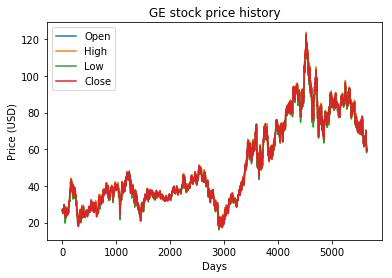

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df_ge["Open"])
plt.plot(df_ge["High"])
plt.plot(df_ge["Low"])
plt.plot(df_ge["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

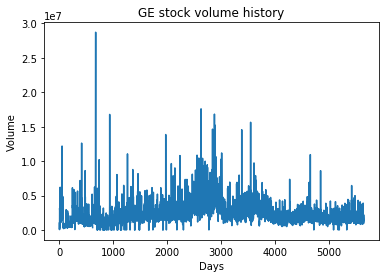

In [0]:
plt.figure()
plt.plot(df_ge["Volume"])
plt.title('GE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [0]:
df_ge = df_ge.dropna(how='any',axis=0) 
print("checking if any null values are present\n", df_ge.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


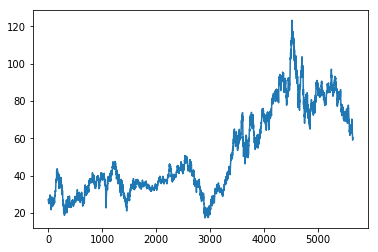

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df_ge['Open'])
plt.show()

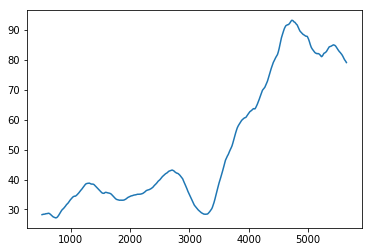

           Open      Close        Low       High       Volume
520   28.265874  28.271000  27.748718  28.801946  1860593.068
521   28.268128  28.273602  27.750764  28.804440  1862724.548
522   28.270124  28.275288  27.752692  28.807192  1865506.598
523   28.274640  28.279650  27.756086  28.812506  1865060.994
524   28.279418  28.283750  27.759104  28.817126  1866772.724
525   28.283364  28.289620  27.764698  28.821470  1861789.464
526   28.290104  28.294460  27.770896  28.826214  1857628.924
527   28.295434  28.301366  27.777356  28.834386  1856388.564
528   28.304640  28.311320  27.786290  28.844076  1856840.718
529   28.314948  28.320800  27.794718  28.853620  1854172.160
530   28.323294  28.327394  27.802344  28.860304  1849873.862
531   28.329502  28.333638  27.807166  28.865844  1843643.536
532   28.334312  28.338464  27.812604  28.872722  1841647.494
533   28.342598  28.346480  27.820694  28.881248  1838981.122
534   28.351748  28.354112  27.829204  28.891260  1836996.598
535   28

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Open","High","Low","Close","Volume"]
op = df_ge.rolling(window = 500)['Open','Close','Low','High','Volume'].mean()

op = pd.DataFrame(op)
plt.figure()
plt.plot(op['Open'])
plt.show()
df_train, df_test = train_test_split(op, train_size=0.8, test_size=0.2, shuffle=False)
df_train = df_train.dropna(how='any',axis=0)
print(df_train)

print("Train and Test size", len(df_train), len(df_test))

print(df_test)
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

In [0]:

def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - 3
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, 3, dim_1))
    y = np.zeros((dim_0,))
    for i in range(dim_0):
        x[i] = mat[i:3+i]
        y[i] = mat[3+i, y_col_index]
    return x, y

In [0]:

def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [0]:

x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, 2)
y_t = trim_dataset(y_t, 2)
x_temp, y_temp = build_timeseries(x_test, 3)
x_val, x_test_t = np.split(trim_dataset(x_temp, 2),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, 2),2)

In [0]:
#from keras.optimizers import Adam
#from keras.layers import Dense,Dropout
#from keras.layers import LSTM
#lstm_model = Sequential()
#lstm_model.add(LSTM(100, batch_input_shape=(2, 3, x_t.shape[0]), stateful=True,kernel_initializer='random_uniform'))
#lstm_model.add(Dropout(0.5))
#lstm_model.add(Dense(20,activation='relu'))
#lstm_model.add(Dense(1,activation='linear'))
#lstm_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.5))
#print(x_t)

from keras.optimizers import Adam
from keras.layers import Dense,Dropout
from keras.layers import LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(2, 3, x_t.shape[2]), stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='linear'))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.5),metrics=['accuracy'])



In [0]:
x_test_t

array([[[0.9778073 , 0.98064917, 0.97496745, 0.97634601, 0.16701532],
        [0.97728229, 0.98018334, 0.97450362, 0.97592483, 0.16720572],
        [0.97689673, 0.97979532, 0.9741596 , 0.97550853, 0.16695096]],

       [[0.97728229, 0.98018334, 0.97450362, 0.97592483, 0.16720572],
        [0.97689673, 0.97979532, 0.9741596 , 0.97550853, 0.16695096],
        [0.97646446, 0.97931421, 0.97375987, 0.9750971 , 0.16455722]],

       [[0.97689673, 0.97979532, 0.9741596 , 0.97550853, 0.16695096],
        [0.97646446, 0.97931421, 0.97375987, 0.9750971 , 0.16455722],
        [0.97594852, 0.97872575, 0.9731976 , 0.9744885 , 0.16356984]],

       ...,

       [[0.90880635, 0.90785028, 0.91141023, 0.90863852, 0.14808043],
        [0.90814574, 0.9072323 , 0.91075336, 0.9080139 , 0.14882119],
        [0.90751162, 0.90658861, 0.91006217, 0.90732482, 0.14945476]],

       [[0.90814574, 0.9072323 , 0.91075336, 0.9080139 , 0.14882119],
        [0.90751162, 0.90658861, 0.91006217, 0.90732482, 0.14945476],

In [24]:
from keras.callbacks import CSVLogger
import os
csv_logger = CSVLogger(os.path.join("User/Documents","/home", "abhi.log"), append=True)
history = lstm_model.fit(x_t, y_t, epochs=50, verbose=2, batch_size=2,
                    shuffle=False, validation_data=(trim_dataset(x_val, 2),
                    trim_dataset(y_val, 2)),callbacks=[csv_logger])

Train on 3992 samples, validate on 560 samples
Epoch 1/10
 - 7s - loss: 1.8830 - acc: 2.5050e-04 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 2/10
 - 7s - loss: 0.0028 - acc: 2.5050e-04 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 3/10
 - 7s - loss: 0.0025 - acc: 2.5050e-04 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 4/10
 - 7s - loss: 0.0026 - acc: 2.5050e-04 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 5/10
 - 7s - loss: 707.6954 - acc: 2.5050e-04 - val_loss: 0.0381 - val_acc: 0.0000e+00
Epoch 6/10
 - 7s - loss: 0.0580 - acc: 0.0000e+00 - val_loss: 0.0204 - val_acc: 0.0000e+00
Epoch 7/10
 - 7s - loss: 0.0100 - acc: 2.5050e-04 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 8/10
 - 7s - loss: 1.5060 - acc: 0.0000e+00 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 9/10
 - 7s - loss: 0.0031 - acc: 2.5050e-04 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 10/10
 - 7s - loss: 0.9482 - acc: 2.5050e-04 - val_loss: 0.0099 - val_acc: 0.0000e+00


In [30]:
score = lstm_model.evaluate(x_test_t,y_test_t)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: ignored

In [0]:
print(history.history.keys())


dict_keys(['val_loss', 'loss'])


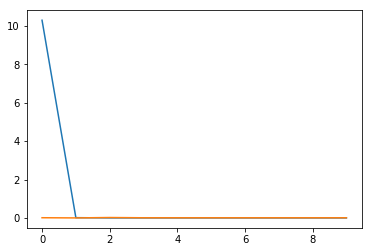

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()